## Step 1 - Import all the necessary libraries for our analysis
* Pandas
* Numpy
* Matplotlib
* Seaborn
* os

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Step 2 - list out all the datasets available and stor them together in a single DataFrame
* We will use the os library to achieve this

In [25]:
# create an empty DataFrame - all_sales
all_sales = pd.DataFrame()

all_sales.shape


(0, 0)

In [26]:
# next use the listdir() of the os library to load the datasets, append the files into the empty DataFrame using pd.concat

files = [file for file in os.listdir("./Sales")]

for file in files :
    df = pd.read_csv("./Sales/"+file, sep=",")
    all_sales = pd.concat([all_sales,df])
    
    
# print out the top rows of the full merged DataFrame - all_sales

all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [27]:
# check the shape of the all_sales DataFrame

all_sales.shape


(186850, 6)

## Step 3 - Let's inspect the datatypes of columns in the all_sales DataFrame
* Data cleaning where needed
* Data transformation - creating new columns to be able to carry out some analysis
etc

In [28]:
# let's check for null values
all_sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [29]:
all_sales.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [30]:
# let's return all rows that are null/nan to be sure there truly exist

all_sales[all_sales.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# let's go ahead and drop all NaN values from our all_sales DataFrame

all_sales = all_sales.dropna(how="all")

In [32]:
# check if the null/NaN values are still available

all_sales[all_sales.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [33]:
all_sales.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [34]:
# Next let's check for dtypes

all_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [35]:
# notice that some columns like "Quantity Ordered", "Price Each" should be numeric, so let's go ahead and convert them to numeric
#columns using pd.to_numeric()

all_sales["Quantity Ordered"] = pd.to_numeric(all_sales["Quantity Ordered"])
all_sales["Price Each"] = pd.to_numeric(all_sales["Price Each"])

ValueError: Unable to parse string "Quantity Ordered" at position 517

In [36]:
# Waoh, we got a "ValueError: Unable to parse string "Quantity Ordered" at position 519"
# let's inspect what we have in the index

all_sales[all_sales.index == 519][0:1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [37]:
# ok we have confirmed that we have some data entry errors where the label of the column was repeated as row values
# let's confirm if there are more rows with such errors and exempt them by rebuilding our all_sales DataFrame

all_sales[all_sales["Quantity Ordered"] == "Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [45]:
# we have about 355 rows of data incorrectly entered so let's go ahead and recreate our all_sales DataFrame

all_sales = all_sales[all_sales["Quantity Ordered"] != "Quantity Ordered"]
all_sales.shape

(185950, 6)

In [46]:
# now let us retry and convert the "Quantity Ordered" and "Price Each" columns to numeric again

all_sales["Quantity Ordered"] = pd.to_numeric(all_sales["Quantity Ordered"])
all_sales["Price Each"] = pd.to_numeric(all_sales["Price Each"])

In [47]:
all_sales.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [50]:
# let do some transformation
# create new colums for months from the "Order Date" column and also compute total sales from the product of " Quantity Ordered"
# and "Price Each" columns

all_sales["Month"] = all_sales["Order Date"].str[0:2]
all_sales["Sales"] = all_sales["Quantity Ordered"] * all_sales["Price Each"]
all_sales


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99


In [51]:
# let's go ahead and chech the dtypes of our all_sales DataFrame once again since we just added new columns

all_sales.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Sales               float64
dtype: object

In [52]:
# for us to be able to answer some business questions bothering on month of sales, we will need to convert the "Month"
# column to numeric
# apart from using the pd.to_numeric(), we can also use the astype() to do the conversion

all_sales["Month"] = all_sales["Month"].astype("int")
all_sales.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
dtype: object

In [53]:
all_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


# Business Question 1
* Compute the monthly sales

In [54]:
result = all_sales.groupby("Month").sum()
result

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


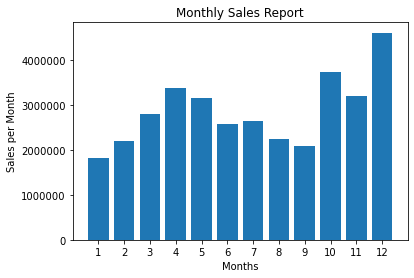

In [56]:
# plot a bar chart of month vs sales

plt.bar(result.index, result["Sales"])
plt.xlabel("Months")
plt.ylabel("Sales per Month")
plt.xticks(result.index)
plt.ticklabel_format(style="plain", axis="y")
plt.title("Monthly Sales Report")
plt.show()

In [ ]:
# change the month notation from "month number" to "month name"

# Business Question 2
* Compute product sales by quantity sold

In [58]:
result1 = all_sales.groupby("Product").sum()
result1

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
20in Monitor,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43
Flatscreen TV,4819,1440000.00,34224,1445700.00


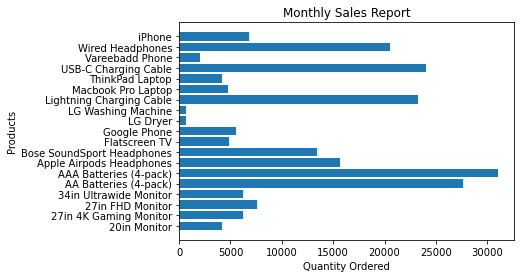

In [61]:
# plot a bar chart of product vs quantity ordered

plt.barh(result1.index, result1["Quantity Ordered"])
plt.xlabel("Quantity Ordered")
plt.ylabel("Products")
plt.title("Monthly Sales Report")
plt.show()

In [63]:
# rework the above results and sort the results in ascending order

resultasc = all_sales.groupby("Product").sum().sort_values(by="Quantity Ordered")
resultasc

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
LG Dryer,646,387600.00,4383,387600.00
LG Washing Machine,666,399600.00,4523,399600.00
Vareebadd Phone,2068,826000.00,14309,827200.00
20in Monitor,4129,451068.99,29336,454148.71
ThinkPad Laptop,4130,4127958.72,28950,4129958.70
Macbook Pro Laptop,4728,8030800.00,33548,8037600.00
Flatscreen TV,4819,1440000.00,34224,1445700.00
Google Phone,5532,3315000.00,38305,3319200.00
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01


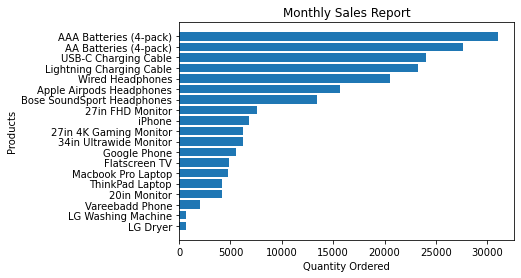

In [64]:
# plot a bar chart of product vs quantity ordered to show the sorted values in ascending order

plt.barh(resultasc.index, resultasc["Quantity Ordered"])
plt.xlabel("Quantity Ordered")
plt.ylabel("Products")
plt.title("Monthly Sales Report")
plt.show()

In [65]:
# rework the above results and sort the results in descending order

resultdsc = all_sales.groupby("Product").sum().sort_values(by="Quantity Ordered", ascending=False)
resultdsc

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83
AA Batteries (4-pack),27635,79015.68,145558,106118.40
USB-C Charging Cable,23975,261740.85,154819,286501.25
Lightning Charging Cable,23217,323787.10,153092,347094.15
Wired Headphones,20557,226395.18,133397,246478.43
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43
27in FHD Monitor,7550,1125974.93,52558,1132424.50
iPhone,6849,4789400.00,47941,4794300.00


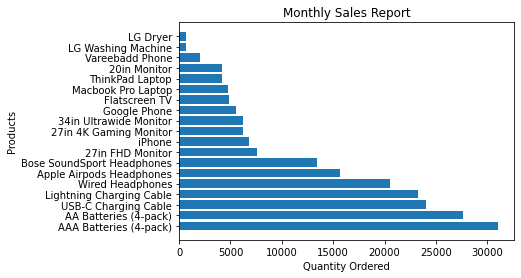

In [66]:
# plot a bar chart of product vs quantity ordered to show the sorted values in descending order

plt.barh(resultdsc.index, resultdsc["Quantity Ordered"])
plt.xlabel("Quantity Ordered")
plt.ylabel("Products")
plt.title("Monthly Sales Report")
plt.show()

# Business Question 3
* Display sales by cities

In [67]:
# first we will need to extract the city from the "Purchase Address"
# we will create two user-defined functions
# get_state() and get_city()
# using the lambda function, we will fetch he respect city and state and plug into a new column called "City"

def get_city(address) :
    return address.split(",")[1]

def get_state(address) :
    return address.split(",")[2].split(" ")[1]

all_sales["City"] = all_sales["Purchase Address"].apply(lambda x: get_city(x) + " (" + get_state(x) + ")")

#using f strings
#all_sales["City"] = all_sales["Purchase Address"].apply(lambda x: f"{get_city(x)}" ({get_state(x)})")

all_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [69]:
# now let's display sales by cities

resultcity = all_sales.groupby("City").sum()
resultcity

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


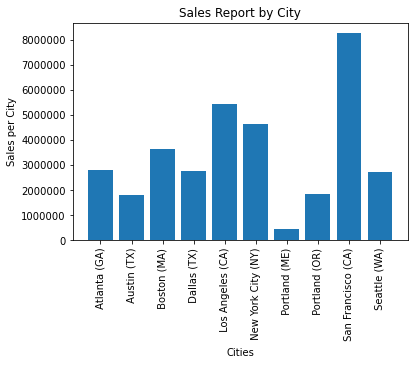

In [71]:
# visualize our results

plt.bar(resultcity.index, resultcity["Sales"])
plt.xlabel("Cities")
plt.xticks(resultcity.index, rotation="vertical")
plt.ylabel("Sales per City")
plt.ticklabel_format(style="plain", axis="y")
plt.title("Sales Report by City")
plt.show()

In [72]:
# rework the above results and sort the results in ascending order

resultcity1 = all_sales.groupby("City").sum().sort_values(by="Sales")
resultcity1

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Portland (ME),2750,447189.25,17144,449758.27
Austin (TX),11153,1809873.61,69829,1819581.75
Portland (OR),11303,1860558.22,70621,1870732.34
Seattle (WA),16553,2733296.01,104941,2747755.48
Dallas (TX),16730,2752627.82,104620,2767975.40
Atlanta (GA),16602,2779908.20,104794,2795498.58
Boston (MA),22528,3637409.77,141112,3661642.01
New York City (NY),27932,4635370.83,175741,4664317.43
Los Angeles (CA),33289,5421435.23,208325,5452570.80


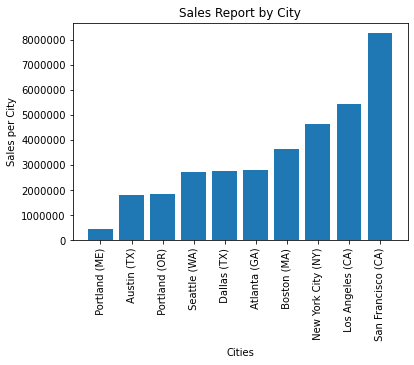

In [74]:
# visualize our results showing the new sort order

plt.bar(resultcity1.index, resultcity1["Sales"])
plt.xlabel("Cities")
plt.xticks(resultcity1.index, rotation="vertical")
plt.ylabel("Sales per City")
plt.ticklabel_format(style="plain", axis="y")
plt.title("Sales Report by City")
plt.show()

In [73]:
# rework the above results and sort the results in descending order

resultcity2 = all_sales.groupby("City").sum().sort_values(by="Sales", ascending=False)
resultcity2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Atlanta (GA),16602,2779908.20,104794,2795498.58
Dallas (TX),16730,2752627.82,104620,2767975.40
Seattle (WA),16553,2733296.01,104941,2747755.48
Portland (OR),11303,1860558.22,70621,1870732.34
Austin (TX),11153,1809873.61,69829,1819581.75


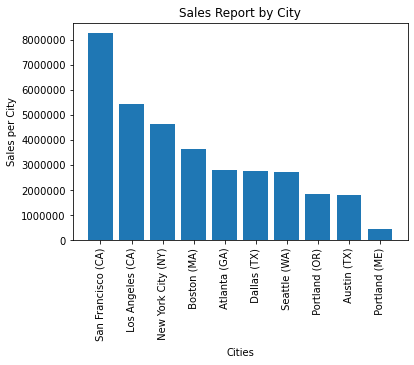

In [75]:
# visualize our results showing the sort order

plt.bar(resultcity2.index, resultcity2["Sales"])
plt.xlabel("Cities")
plt.xticks(resultcity2.index, rotation="vertical")
plt.ylabel("Sales per City")
plt.ticklabel_format(style="plain", axis="y")
plt.title("Sales Report by City")
plt.show()

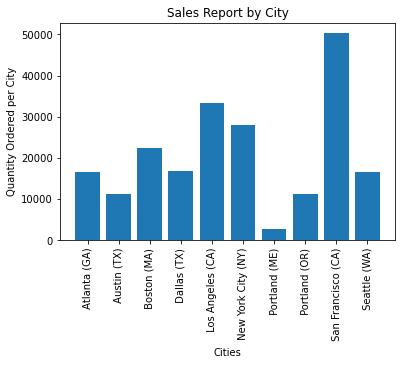

In [77]:
# compute quantities sold by city

# visualize our results showing the sort order

plt.bar(resultcity.index, resultcity["Quantity Ordered"])
plt.xlabel("Cities")
plt.xticks(resultcity.index, rotation="vertical")
plt.ylabel("Quantity Ordered per City")
plt.ticklabel_format(style="plain", axis="y")
plt.title("Sales Report by City")
plt.show()

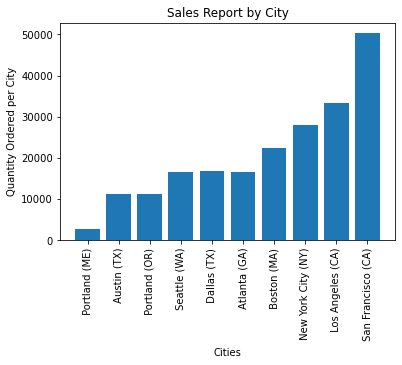

In [78]:
# compute quantities sold by city

# visualize our results showing the sort order - ascending order

plt.bar(resultcity1.index, resultcity1["Quantity Ordered"])
plt.xlabel("Cities")
plt.xticks(resultcity1.index, rotation="vertical")
plt.ylabel("Quantity Ordered per City")
plt.ticklabel_format(style="plain", axis="y")
plt.title("Sales Report by City")
plt.show()

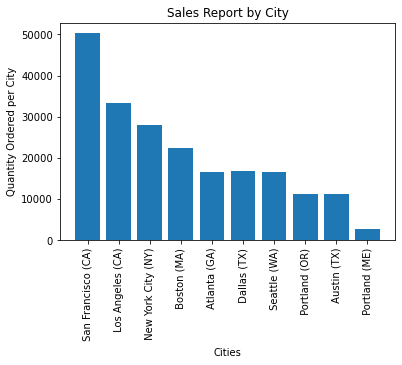

In [79]:
# compute quantities sold by city

# visualize our results showing the sort order - descending order

plt.bar(resultcity2.index, resultcity2["Quantity Ordered"])
plt.xlabel("Cities")
plt.xticks(resultcity2.index, rotation="vertical")
plt.ylabel("Quantity Ordered per City")
plt.ticklabel_format(style="plain", axis="y")
plt.title("Sales Report by City")
plt.show()

# Business Question 3
* Using the "Order Date" column advise on when best to advertize putting into consideration the peak sales period

In [80]:
# check the dtypes of all_sales again to confirm if "Order Date" is ready for analysis
all_sales.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
City                 object
dtype: object

In [ ]:
# we need to convert "Order Date" to a datetime type before we proceed

all_sales["Order Date"] = pd.to_datetime(all_sales["Order Date"])

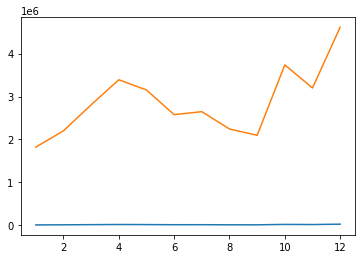

In [83]:
# show the relationship between quantity ordered and sales
fig, ax = plt.subplots()
ax1 = twin.ax
ax.plot(result.index,result["Quantity Ordered"])
ax.plot(result.index,result["Sales"])
plt.show()